In [1]:
import re
import itertools
import numpy as np
import pandas as pd

from collections import Counter
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

from nltk import everygrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_excel('data/OperationeleRapportage_25-02-2020_10-03-2020.xlsx')
df = df[df['ContactMomentType'].isin(['Inbound Call', 'Telefoon in'])]
df = df.reset_index(drop=True)

In [3]:
df.head()

,Contact ID,Registratie ID,ContactMomentType,Datum Tijd,Searchcode,Klantcode,Actie-ID,Actielijst,Omschrijving,Status,...,Pakketten,Type Klant,Business_pack_klant,Vast_draadloos,Type Script,Script,Eigen Input,Unnamed: 58,Unnamed: 59,Datum Tijd export
0,3107123,3143850.0,Telefoon in,2020-02-25 07:46:16.000,4341LA6,50151815,613076.0,Contracts,*Factuurvragen,Close,...,Interactieve Televisie Coax\r\nInternet Flexpa...,Consument,Nee,Nee,DELTA Coax,DELTA Back Office,IOM Milena:\r\n\r\nGraag REKNR weghalen (is fo...,NaN,NaN,2020-03-09 16:37:58.150
1,3107152,3143879.0,Telefoon in,2020-02-25 08:01:59.000,4461RV58,50136521,NaN,NaN,NaN,NaN,...,Interactieve Televisie Coax\r\nInternet Flexpa...,Consument,Nee,Nee,DELTA Coax,DELTA,\r\nGeen e-mail verstuurd\r\n,NaN,NaN,2020-03-09 16:37:58.150
2,3107173,3143900.0,Telefoon in,2020-02-25 08:09:48.000,4511BX24,0,NaN,NaN,NaN,NaN,...,\r\n\r\n\r\n\r\n\r\n\r\n\r\n,Consument,NaN,NaN,DELTA Coax,DELTA Back Office,Aangevraagd Delta mobiel 4 GB – Extra + 4 maan...,NaN,NaN,2020-03-09 16:37:58.150
3,3107176,3143903.0,Telefoon in,2020-02-25 08:09:53.000,4531CN81,50132947,613013.0,Contracts,factuurvragen,Open,...,Interactieve Televisie Coax\r\nInternet Flexpa...,Consument,Nee,Nee,DELTA Coax,DELTA,Klant krijgt dubbele factuur op dit adres voor...,NaN,NaN,2020-03-09 16:37:58.150
4,3107182,3143909.0,Telefoon in,2020-02-25 08:12:54.000,4413ES39,50108575,NaN,NaN,NaN,NaN,...,Standaardpakket televisie\r\n\r\n\r\n\r\n\r\n\...,Consument,Nee,Nee,DELTA Coax,DELTA,klant had een herinnering ontvangen over factu...,NaN,NaN,2020-03-09 16:37:58.150


In [32]:
df.shape

(21460, 61)

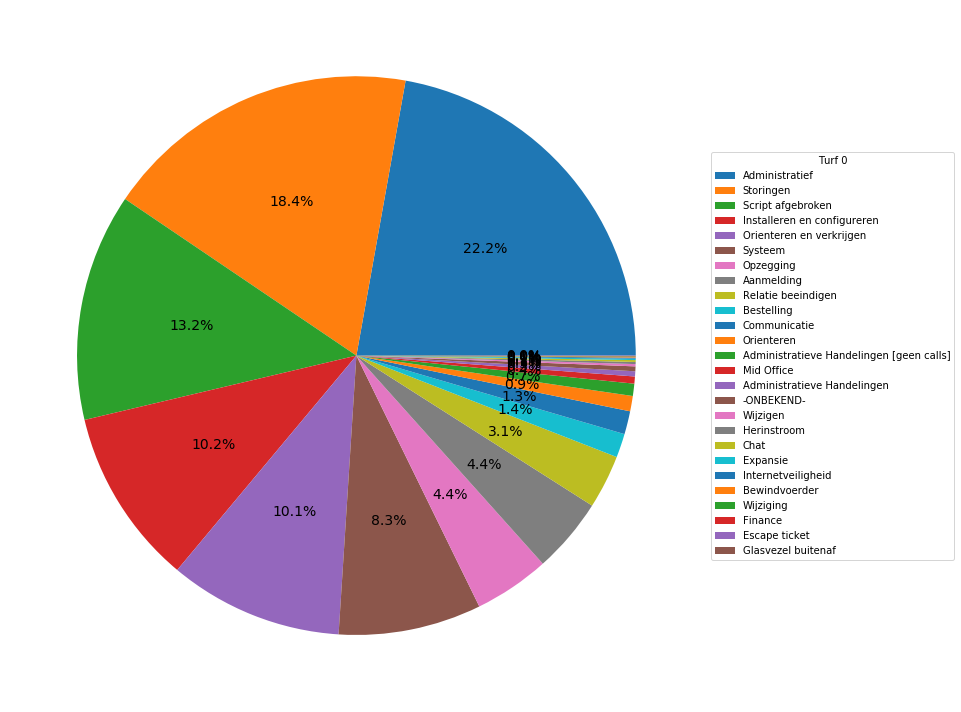

Index(['Administratief', 'Storingen', 'Script afgebroken',
       'Installeren en configureren', 'Orienteren en verkrijgen', 'Systeem',
       'Opzegging', 'Aanmelding', 'Relatie beeindigen', 'Bestelling',
       'Communicatie', 'Orienteren',
       'Administratieve Handelingen [geen calls]', 'Mid Office',
       'Administratieve Handelingen', '-ONBEKEND-', 'Wijzigen', 'Herinstroom',
       'Chat', 'Expansie', 'Internetveiligheid', 'Bewindvoerder', 'Wijziging',
       'Finance', 'Escape ticket', 'Glasvezel buitenaf'],
      dtype='object')

In [95]:
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect="equal"))

counts = df['Turfje 0'].value_counts()

# wedges, texts, autotexts = ax.pie(counts.values, labels=list(counts.index), autopct='%1.1f%%', textprops={'fontsize': 14})

wedges, texts, autotexts = ax.pie(counts.values, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.tight_layout()

ax.legend(wedges, counts.index,
          title="Turf 0",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.savefig('piechart_turf0.png')
plt.show()
counts.index

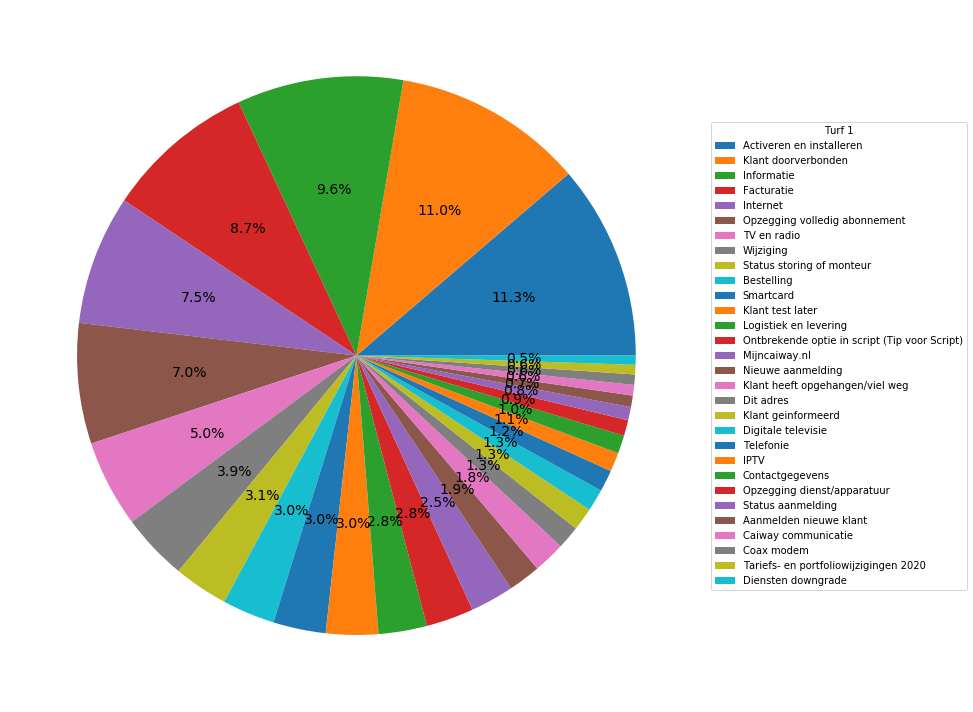

Index(['Activeren en installeren', 'Klant doorverbonden', 'Informatie',
       'Facturatie', 'Internet', 'Opzegging volledig abonnement',
       'TV en radio', 'Wijziging', 'Status storing of monteur', 'Bestelling',
       'Smartcard', 'Klant test later', 'Logistiek en levering',
       'Ontbrekende optie in script (Tip voor Script)', 'Mijncaiway.nl',
       'Nieuwe aanmelding', 'Klant heeft opgehangen/viel weg', 'Dit adres',
       'Klant geinformeerd', 'Digitale televisie', 'Telefonie', 'IPTV',
       'Contactgegevens', 'Opzegging dienst/apparatuur', 'Status aanmelding',
       'Aanmelden nieuwe klant', 'Caiway communicatie', 'Coax modem',
       'Tariefs- en portfoliowijzigingen 2020', 'Diensten downgrade'],
      dtype='object')

In [116]:
counts = df['Turfje 1'].value_counts()[(df['Turfje 1'].value_counts() >= 100)]

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect="equal"))

# wedges, texts, autotexts = ax.pie(counts.values, labels=list(counts.index), autopct='%1.1f%%', textprops={'fontsize': 14})

wedges, texts, autotexts = ax.pie(counts.values, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.tight_layout()

ax.legend(wedges, counts.index,
          title="Turf 1",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.savefig('piechart_turf0.png')
plt.show()
counts.index

In [104]:
caiway_df = df[(df['Type Script'] == 'Caiway')]
delta_df = df[~(df['Type Script'] == 'Caiway')]
# (delta_df['Turfje 10'].value_counts()/len(delta_df))

In [120]:
delta_df['Turfje 1'].value_counts() / len(caiway_df)

Klant doorverbonden                              0.089170
Facturatie                                       0.070833
Activeren en installeren                         0.063749
Internet                                         0.042657
Smartcard                                        0.041162
Wijziging                                        0.031009
Opzegging volledig abonnement                    0.028805
Informatie                                       0.022273
Dit adres                                        0.020227
Klant geinformeerd                               0.019991
Digitale televisie                               0.019204
TV en radio                                      0.017315
Contactgegevens                                  0.015583
Ontbrekende optie in script (Tip voor Script)    0.014324
Mijncaiway.nl                                    0.014009
Status aanmelding                                0.011569
Telefonie                                        0.010625
Aanmelden nieu

In [100]:
set(delta_df['Turfje 1'])# == 'Centrale storing / Werkzaamheden')

{'-ONBEKEND-',
 'Aanmelden nieuwe klant',
 'Aanmelding annuleren',
 'Aanmelding wijzigen',
 'Acties',
 'Activatie call',
 'Activeren en installeren',
 'Adres komt voor',
 'Apparatuur',
 'Bekende storing/-werkzaamheden',
 'Bestelling',
 'Bol.com cadeaukaart',
 'Caiway communicatie',
 'Caiway mobiel',
 'Contactgegevens',
 'Diensten downgrade',
 'Diensten opzeggen',
 'Digitale televisie',
 'Dit adres',
 'FTTH DELTA',
 'FTTH modem',
 'Facturatie',
 'Geen bekende storingen of werkzaamheden',
 'Geen order in de portal',
 'Gegevens wijzigen',
 'Helpdesk',
 'IPTV',
 'IPTV diensten',
 'Informatie',
 'Informatie gegeven',
 'Internet',
 'Internet diensten',
 'Klachten',
 'Klant doorverbonden',
 'Klant doorverwezen, KCC gesloten',
 'Klant geinformeerd',
 'Klant heeft opgehangen/viel weg',
 'Klant is niet thuis',
 'Klant niet te bereiken (Outbound call)',
 'Klant test later',
 'Klant verkeerd doorverbonden',
 'Klant was niet te horen',
 'Logistiek en levering',
 'Mid Office HD',
 'Mid Office HD Naz

In [64]:
df.groupby(['Type Script']).count()

,Contact ID,Registratie ID,ContactMomentType,Datum Tijd,Searchcode,Klantcode,Actie-ID,Actielijst,Omschrijving,Status,Sub_Status,In behandeling bij,Datum (gesloten),Tijd (gesloten),Inhoud,Logging,Aangemaakt door,Afdeling,Medewerker,Ticket-ID,TopDesk-nummer,Ticketgroep,Ticketonderwerp,Doorgestuurd (naar),Doorgestuurd (datum),Doorgestuurd (tijd),Status.1,Inhoud.1,Logging.1,In behandeling bij.1,Datum (gesloten).1,Tijd (gesloten).1,Aangemaakt door.1,Afdeling.1,Medewerker.1,Turfje 0,Turfje 1,Turfje 2,Turfje 3,Turfje 4,Turfje 5,Turfje 6,Turfje 7,Turfje 8,Turfje 9,Turfje 10,Turfje 11,Turfje 12,Zekatelnummer,Startdatum_abonnement,Einddatum_abonnement,Pakketten,Type Klant,Business_pack_klant,Vast_draadloos,Script,Eigen Input,Unnamed: 58,Unnamed: 59,Datum Tijd export
Type Script,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Caiway,12706,12706,12706,12706,12706,12706,2605,2605,2605,2605,764,34,2296,2296,2605,2605,12706,12706,12706,975,86,975,975,376,376,376,975,975,975,975,747,747,975,975,975,12706,12706,12706,9001,7655,4827,2722,2028,1646,2810,12706,11799,12232,12706,12706,0,12706,12706,11,114,9921,11249,0,0,12706
DELTA,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1
DELTA Coax,7386,7386,7386,7386,7386,7386,1716,1716,1715,1716,147,16,1206,1206,1716,1716,7386,7386,7386,325,0,325,325,325,325,325,325,325,325,325,254,254,325,325,325,7386,7386,7386,4798,3439,1828,1067,388,115,8,7386,5678,6472,7386,7386,0,7386,7386,7050,7049,7386,6662,0,0,7386
DELTA Glasvezel,898,898,898,898,898,898,234,234,234,234,15,5,215,215,234,234,898,898,898,80,20,80,80,31,31,31,80,80,80,80,62,62,80,80,80,898,898,898,501,257,158,97,72,790,873,898,791,876,898,898,0,898,898,815,815,898,828,0,0,898


In [31]:
pd.options.display.max_columns = 999
df[df['Turfje 1'] == "Klant doorverbonden"]

,Contact ID,Registratie ID,ContactMomentType,Datum Tijd,Searchcode,Klantcode,Actie-ID,Actielijst,Omschrijving,Status,Sub_Status,In behandeling bij,Datum (gesloten),Tijd (gesloten),Inhoud,Logging,Aangemaakt door,Afdeling,Medewerker,Ticket-ID,TopDesk-nummer,Ticketgroep,Ticketonderwerp,Doorgestuurd (naar),Doorgestuurd (datum),Doorgestuurd (tijd),Status.1,Inhoud.1,Logging.1,In behandeling bij.1,Datum (gesloten).1,Tijd (gesloten).1,Aangemaakt door.1,Afdeling.1,Medewerker.1,Turfje 0,Turfje 1,Turfje 2,Turfje 3,Turfje 4,Turfje 5,Turfje 6,Turfje 7,Turfje 8,Turfje 9,Turfje 10,Turfje 11,Turfje 12,Zekatelnummer,Startdatum_abonnement,Einddatum_abonnement,Pakketten,Type Klant,Business_pack_klant,Vast_draadloos,Type Script,Script,Eigen Input,Unnamed: 58,Unnamed: 59,Datum Tijd export
7,3107195,3143922.0,Telefoon in,2020-02-25 08:19:40.000,0000AB0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lisa Helleman,DELTA team Customer Care Delta Fiber,D101207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Administratief,Klant doorverbonden,Klantcontact voor DELTA Energie,Klantcontact voor DELTA Energie,NaN,NaN,NaN,NaN,NaN,NaN,Vraag beantwoord - probleem opgelost,NaN,ONBEKEND,ONBEKEND,Onbekend,NaN,\r\n\r\n\r\n\r\n\r\n\r\n\r\n,Consument,NaN,NaN,DELTA Coax,DELTA,\r\nGeen e-mail verstuurd\r\n,NaN,NaN,2020-03-09 16:37:58.150
13,3107251,3143978.0,Telefoon in,2020-02-25 08:32:34.000,4381SJ65,50028845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denise de Vries,DELTA team Customer Care Delta Fiber,D101258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Administratief,Klant doorverbonden,Retentiedesk,Ik verbind de klant door naar Retentiedesk,Bel Retentiedesk (via de CIC),NaN,NaN,NaN,NaN,NaN,Doorverwezen naar Retentiedesk,Coax,VLISSINGEN,1080304C05,16-06-2002,NaN,Interactieve Televisie Coax\r\nInternet Flexpa...,Consument,Nee,Nee,DELTA Coax,DELTA,\r\nGeen e-mail verstuurd\r\n,NaN,NaN,2020-03-09 16:37:58.150
28,3107323,3144050.0,Telefoon in,2020-02-25 08:42:21.000,4388KG57,50031785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aileen Frenken,DELTA Customer Care Call-IT,D101291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Administratief,Klant doorverbonden,Retentiedesk,Openstaande Actie/Ticket,Retentiedesk neemt telefoon niet op,NaN,NaN,NaN,NaN,NaN,Vraag beantwoord - probleem opgelost,Coax,OOST-SOUBURG,1020405B12,01-01-2002,NaN,Interactieve Televisie Coax\r\nInternet Flexpa...,Consument,Nee,Nee,DELTA Coax,DELTA,meneer heeft nog steeds geen smartcard ontvang...,NaN,NaN,2020-03-09 16:37:58.150
34,3107347,3144075.0,Telefoon in,2020-02-25 08:45:49.000,4381RP29,50133182,613027.0,MKB Desk,Terugbelverzoek Zakelijke klantenservice - Tec...,Close,NaN,NaN,2020-02-25,11:41:12.0000000,25-02-2020 11:41:09 Ricky Rijsdijk:<br>\ndone....,25-02-2020 11:41:12 Ricky Rijsdijk heeft de ac...,Denise de Vries,DELTA team Customer Care Delta Fiber,D101258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Administratief,Klant doorverbonden,MKB-desk,Zakelijke klantenservice neemt niet op,NaN,NaN,NaN,NaN,NaN,NaN,Actie aangemaakt,NaN,VLISSINGEN,1080307A05,02-07-2014,NaN,Internet Flexpakket Coax\r\nZakelijke Coax\r\n...,Zakelijk,Ja,Nee,DELTA Coax,DELTA,\r\nGeen e-mail verstuurd\r\n,NaN,NaN,2020-03-09 16:37:58.150
39,3107395,3144123.0,Telefoon in,2020-02-25 08:52:53.000,4328LA73,50072107,613035.0,Contracts,Mutatie NAW/IBAN,Open,NaN,NaN,NaN,NaN,26-02-2020 13:40:22 Maurice Timmermans:<br>\nB...,03-03-2020 08:40:32 Marnix Vader heeft de kort...,Maurice Timmermans,DELTA team Service & Distributie,D100202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Administratief,Klant doorverbonden,MKB-desk,Zakelijke klantenservice neemt niet op,NaN,NaN,NaN,NaN,NaN,NaN,Actie aangemaakt,NaN,BURGH-HAAMSTEDE,4080402B12,14-02-2019,NaN,Interactieve Televisie Coax\r\nInternet Flexpa...,Zakelijk,Ja,Nee,DELTA Coax,DELTA Back Office,Klant krijgt weer facturen met ons adres als c...,NaN,NaN,2020-03-09 16:37:58.150
46,3107435,3144163.0,Telefoon in,2020-02

In [238]:
stemmer = SnowballStemmer("dutch")
textdata = [word_tokenize(str(x)) for x in df['Eigen Input']]
# textdata = [ [stemmer.stem(x) for x in sentence] for sentence in textdata]

In [279]:
word_counts = Counter(itertools.chain(*textdata))
most_common_words = [x[0] for x in word_counts.most_common()]
vocabulary = {key: value for value, key in enumerate(most_common_words)}

In [276]:
gramdata = [[" ".join(x) for x in everygrams(str(sent).split(), max_len=3)] for sent in df['Eigen Input']]

In [282]:
len(vocabulary)

533790

In [231]:
cv.fit_transform(["Dit is een test", "Nog een test"]).toarray()

array([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1]])

In [255]:
cv = CountVectorizer(ngram_range=(1,3))
newdata = []
for x in textdata:
    try:
        newdata.append(cv.fit_transform(x).toarray())
    except Exception as e:
        pass

In [257]:
cv.get_feature_names()

['weten', 'wil']

In [194]:
transformed_textdata = [[vocabulary[word] for word in sent] for sent in textdata]

In [286]:
for _, x_df in df.groupby('Turfje 0'):
    print(_)
    textdata = [word_tokenize(str(x)) for x in x_df['Eigen Input']]
#     print('Average length {:.2f}'.format(np.mean([len(x) for x in textdata])))
#     textdata = [ [stemmer.stem(x) for x in sentence] for sentence in textdata]
    gramdata = [[" ".join(x) for x in everygrams(str(sent).split(), min_len=2, max_len=3)] for sent in x_df['Eigen Input']]
    textdata=gramdata
    word_counts = Counter(itertools.chain(*textdata))
    most_common_words = [x[0] for x in word_counts.most_common() if x[0] not in stopwords.words('dutch')]
    print(most_common_words[:25])


-ONBEKEND-
['het modem', 'modem vervangen', 'Klant heeft', 'gekoppeld aan', 'Guidion monteur', 'Graag modem', 'aan de', 'klant heeft', 'heeft een', 'Graag modem vervangen', 'problemen met', 'niet goed', 'maar deze', 'deze blijven', 'met meerdere', 'maar deze blijven', 'last van', 'gekoppeld aan de', 'TEST TEST', 'Klant gekoppeld', 'aan storing', 'Klant gekoppeld aan', 'gekoppeld aan storing', '- Guidion', 'monteur haalt']
Aanmelding
['€ 0,00', 'van de', 'te zijn', 'eenmalige kosten', 'Totaal /mnd', 'maanden €', 'Geen e-mail', 'e-mail verstuurd', 'Geen e-mail verstuurd', 'Duur van', 'de overeenkomst:', 'Duur van de', 'van de overeenkomst:', 'Maandelijkse kosten', 'Persoonlijke gegevens', 'Eenmalige kosten', '3 maanden', 'op de', '€ 19,95', '12 maanden', 'voor de', 'Actie: van', 'van €', 'voor €', 'Handtekening: Plaats:']
Administratief
['Geen e-mail', 'e-mail verstuurd', 'Geen e-mail verstuurd', 'de klant', 'Klant heeft', 'is verstuurd', 'verstuurd naar', 'is verstuurd naar', 'van de', 

['Geen e-mail', 'e-mail verstuurd', 'Geen e-mail verstuurd', 'Klant heeft', 'de klant', 'klant heeft', 'aan dat', 'geeft aan', 'in de', 'dat hij', 'van de', 'doorverbonden naar', 'op de', 'heeft een', 'heeft geen', 'geeft aan dat', 'dvb naar', 'met de', 'is niet', 'dat het', 'Klant wilt', 'nog niet', 'het niet', 'klant gaat', 'het modem']
Storingen
['Geen e-mail', 'e-mail verstuurd', 'Geen e-mail verstuurd', 'Klant heeft', 'klant heeft', 'de klant', 'op de', 'heeft geen', 'van de', 'in de', 'aan dat', 'geeft aan', 'met de', 'het modem', 'verstuurd naar', 'is verstuurd', 'is verstuurd naar', 'Klant heeft geen', 'heeft een', 'de storing', 'op het', 'geen internet', 'over de', 'aan de', 'geeft aan dat']
Systeem
['Gewijzigd van', 'Handmatig overmaken', 'overmaken naar', 'naar automatische', 'automatische incasso', 'incasso met', 'met IBAN:', 'Handmatig overmaken naar', 'overmaken naar automatische', 'naar automatische incasso', 'automatische incasso met', 'incasso met IBAN:', 'mobilePhoneN

In [136]:
ticket_records = df[~df['Ticket-ID'].isna()]

In [137]:
len(ticket_records)

1380

In [138]:
ticket_df = pd.read_excel('data/Tickets 25-2 - nu.xlsx')

In [139]:
ticket_df_comments = ticket_df[~ticket_df['Oorzaak_Storing_Monteur'].isna()]

In [140]:
calls_tickets = [x for x in ticket_records['Ticket-ID']]

In [141]:
tickets = [x for x in ticket_df['Ticket_Nummer']]

In [142]:
len([x for x in calls_tickets if x in tickets])

1249